In [53]:
! git clone https://github.com/ds3001f25/visualization_assignment.git

fatal: destination path 'visualization_assignment' already exists and is not an empty directory.


In [54]:
%cd visualization_assignment

/content/visualization_assignment/visualization_assignment


In [55]:
!ls ./data

college_completion.csv	pretrial_data.csv  VirginiaPretrialData2017Codebook.pdf


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#loading in the pretrial dataset
import pandas as pd
pretrial_dataset = pd.read_csv('./data/pretrial_data.csv')

In [58]:
#Guassian Kernel
def gaussian_kernel (center, bandwidth, grid):
  u = (grid - center) / bandwidth
  density = (1/(bandwidth*np.sqrt(2*np.pi))) * np.exp(-0.5*u**2)
  return density

In [59]:
# Uniform bump kernel
def uniform_kernel (center, bandwidth, grid):
  u = (grid - center) / bandwidth
  return (np.abs(u) <= 1) * (0.5 / bandwidth)
  return density


In [60]:
# Epanechinikov Kernel
def epanechnikov_kernel(center, bandwidth, grid):
    u = (grid - center) / bandwidth
    density = (3/4) * (1 - u**2) * (np.abs(u) <= 1) / bandwidth
    return density

In [61]:
# Here i'm using the Silverman's plug-in
def silverman_bandwidth(x):
    n = len(x)
    std = np.std(x, ddof=1)
    return 1.06 * std * n**(-1/5)

In [62]:
#Here i'm making the KDE plot
def kde_plot(x, kernel_density="gaussian", h=None, gridsize=400, ax=None, label=None):
    x = pd.Series(x).dropna().to_numpy()
    n = len(x)
    if h is None:
      h = silverman_bandwidth(x)
    sd = np.std(x, ddof=1)
    grid = np.linspace(x.min()-2*sd, x.max()+2*sd, gridsize)

    #Here I'm selecting a kernel
    if kernel_density == 'gaussian':
        kern = gaussian_kernel
        label = 'Gaussian'
    elif kernel_density == 'uniform':
        kern = uniform_kernel
        label = 'Uniform'
    elif kernel_density == 'epanechnikov':
        kern = epanechnikov_kernel
        label = 'Epanechnikov'
    else:
        raise ValueError(f"Unknown kernel: {kernel_density}")

    # here i'm computing KDE using broadcasting
    U = (grid[None, :] - x[:, None]) / h
    if kernel_density == "gaussian":
      k = np.exp(-0.5*U**2) / (h*np.sqrt(2*np.pi))
    elif kernel_density == "uniform":
      k = (np.abs(U) <= 1) * (0.5/h)
    else:
      k = ((np.abs(U) <=1) * (3/4) * (1-U**2)) / h

    kde_vals = k.mean(axis=0)

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)

# Loading the college completion dataset
college_completion_dataset = pd.read_csv('./data/college_completion.csv', low_memory=False)
# checking to see if these columns exist and are there
college_completion_dataset.columns.tolist()

In [64]:
#here I'm checking the dimensions and the names of the variables
print("Shape:", college_completion_dataset.shape)
print("Columns:", college_completion_dataset.columns.tolist())

college_completion_dataset.head()

Shape: (3798, 63)
Columns: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_e

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


The dataset contains 3,798 institutions with 63 variables with details on control, level, aid, grad rates, and various other characteristics of colleges and universities.

In [65]:
#crosstabulation of level and control
crosstab = pd.crosstab(college_completion_dataset['level'], college_completion_dataset['control'])
print(crosstab)

control  Private for-profit  Private not-for-profit  Public
level                                                      
2-year                  465                      68     926
4-year                  527                    1180     632


Per the outputted data the 2-year institutions are primarily public, while the 4-year institutions the majority oare private not-for-profit.

In [66]:
# here i'm coercing to numeric to ensure it comes out successfully as text
college_completion_dataset['grad_100_value'] = pd.to_numeric(college_completion_dataset['grad_100_value'], errors='coerce')

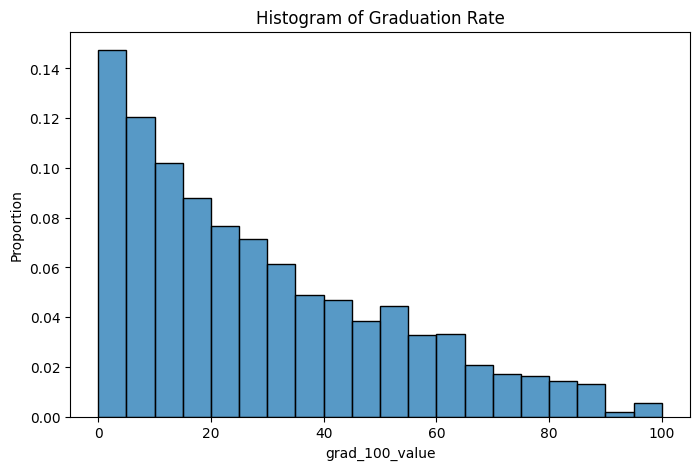

In [67]:
#here i'm creating the dataset histogram
sns.histplot(data=college_completion_dataset, x='grad_100_value', stat='proportion', bins=20)
plt.title('Histogram of Graduation Rate')
plt.xlabel('grad_100_value')
plt.ylabel('Proportion')
plt.show()

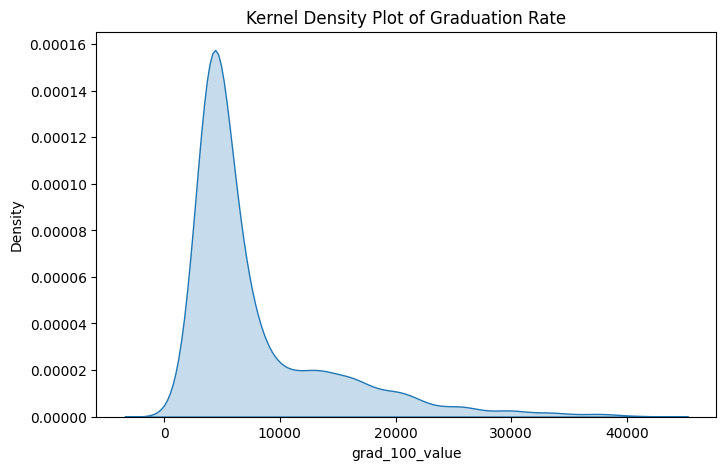

In [104]:
# Here I'm creating a Kernel Density plot
sns.kdeplot(data=college_completion_dataset, x='grad_100_value', fill=True)
plt.title('Kernel Density Plot of Graduation Rate')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

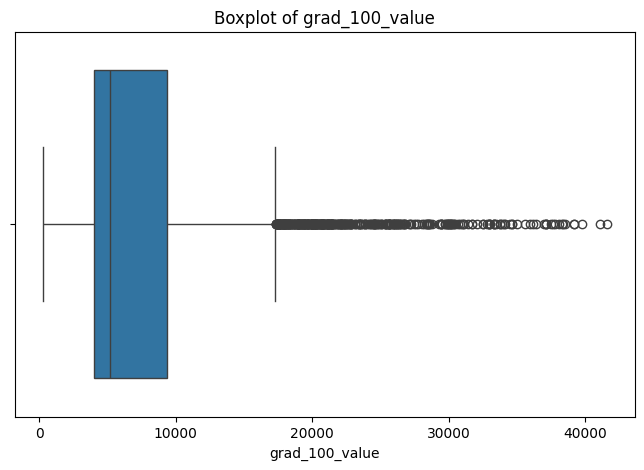

In [103]:
# Here I'm creating the Box Plot
sns.boxplot(x=college_completion_dataset['grad_100_value'])
plt.xlabel('grad_100_value')
plt.title('Boxplot of grad_100_value')
plt.show()

In [70]:
# Statisitcal description
college_completion_dataset['grad_100_percentile'].describe()

,grad_100_percentile
count,3467.000000
mean,46.728295
std,30.541469
min,0.000000
25%,20.000000
50%,46.000000
75%,73.000000
max,100.000000


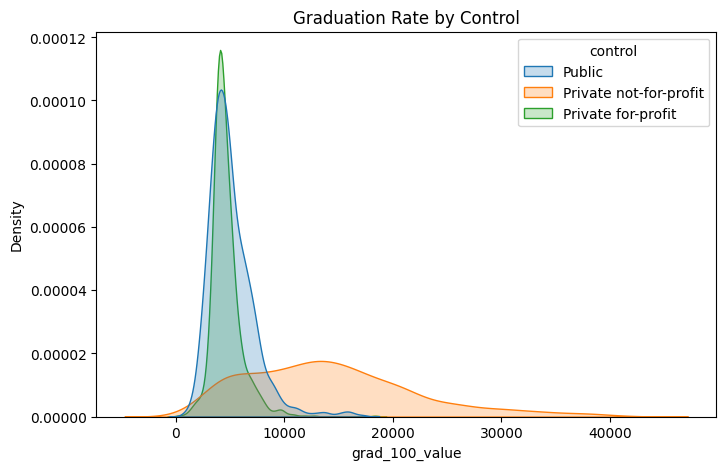

In [101]:
#Grouped KDE by control
sns.kdeplot(data=college_completion_dataset, x='grad_100_value', hue='control', fill=True)
plt.title('Graduation Rate by Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

The grouped KDE plot shows that private not for profit institutions have higher and more spread-out graduation rates.

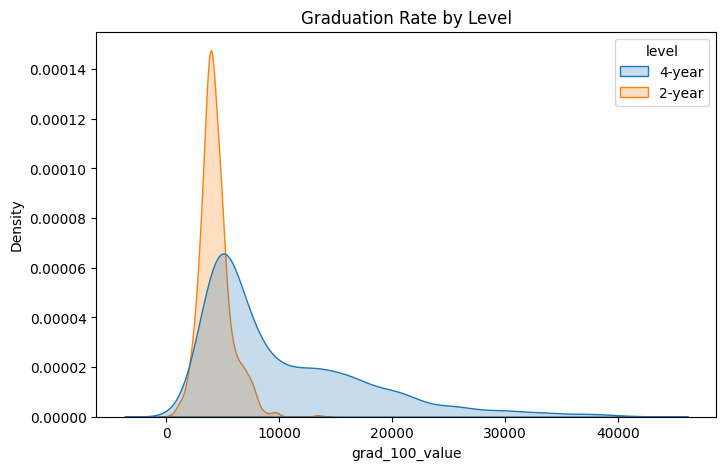

In [100]:
#KDE group by level
sns.kdeplot(data=college_completion_dataset, x='grad_100_value', hue='level', fill=True)
plt.title('Graduation Rate by Level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

Per the KDE plot graduation rates at 2-year institutions are tightly clustered, while 4-year institutions show more variation in outcomes, with some getting higher graduation rates.

In [73]:
#Here i'm looking at the stats for the grouped level
print(college_completion_dataset.loc[:, ['grad_100_value', 'level']].groupby('level').describe())

       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


2-year schools have an average graduation rate of 22%, while 4-year schools average 33%. Though 4-year institutions typically perform better, both of the groups show a large variation with some schools reaching 100% and others close to 0%

In [74]:
#Here i'm looking at the stats for the grouped control
print(college_completion_dataset.loc[:, ['grad_100_value','control']].groupby('control').describe())


                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  


Private not-for-profit schools have the highest average graduation rates of 42% followed by private for-profts with 29% then public with the lowest average grad rate with 17%. However, all groups show large variation.

In [75]:
#interaction label
college_completion_dataset['control_level'] = college_completion_dataset['level'].astype(str) + ', ' + college_completion_dataset['control'].astype(str)

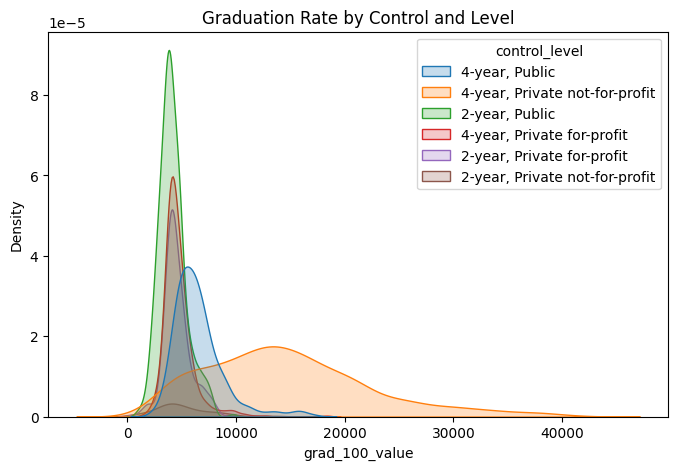

In [99]:
sns.kdeplot(data=college_completion_dataset, x='grad_100_value', hue='control_level', fill=True)
plt.title('Graduation Rate by Control and Level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

The KDE plot by control and level shows 4-year private not-for-profit institutions having highest grad rates with 2-year public institutions having the lowest rates.

In [77]:
#aid_value Coercing to numeric
college_completion_dataset['grad_100_value'] = pd.to_numeric(college_completion_dataset['aid_value'], errors='coerce')

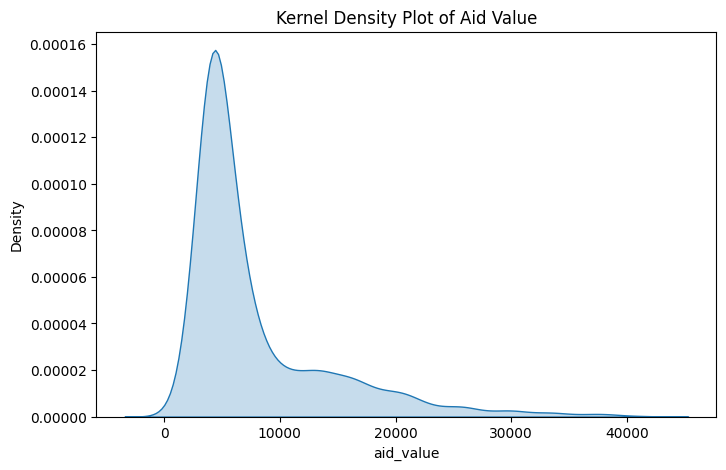

In [98]:
#Creating KDE of aid_value
sns.kdeplot(data=college_completion_dataset, x='aid_value', fill=True)
plt.title('Kernel Density Plot of Aid Value')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

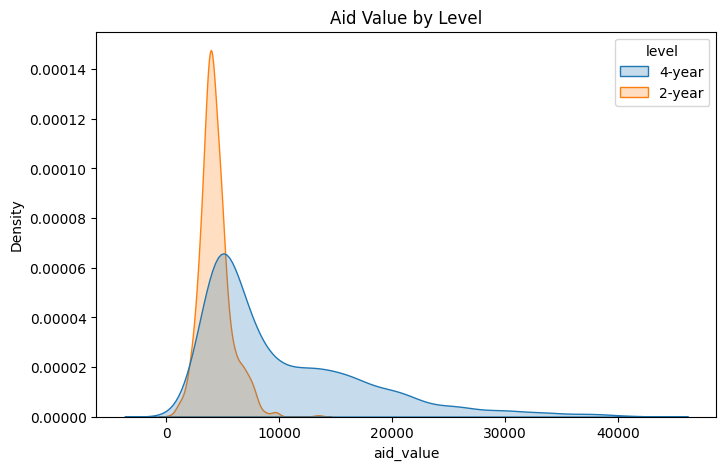

In [97]:
#Grouping Aid_value by level
sns.kdeplot(data=college_completion_dataset, x='aid_value', hue='level', fill=True)
plt.title('Aid Value by Level')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

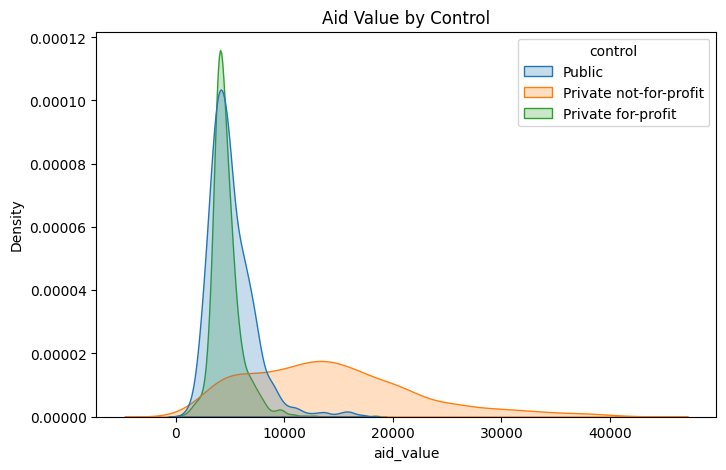

In [96]:
#Grouping aid_value by control
sns.kdeplot(data=college_completion_dataset, x='aid_value', hue='control', fill=True)
plt.title('Aid Value by Control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

The shape of the KDE curves reflects a large difference in aid pacakges across institution types with private not-for-profit offering more spread out and oftern larger packages.

In [81]:
#Group Stats for aid_value level
print(college_completion_dataset.loc[:, ['aid_value', 'level']].groupby('level').describe())

       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0  


In [105]:
#Group stats for aid_value control
print(college_completion_dataset.loc[:, ['aid_value', 'control']].groupby('control').describe())

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  


Private not-for-profit institutions have much higher average aid packages with an average of 14,181 but also a greater variability with roughly 7,773 std. This is why their KDE distribution is flatter and long-tailed curve.

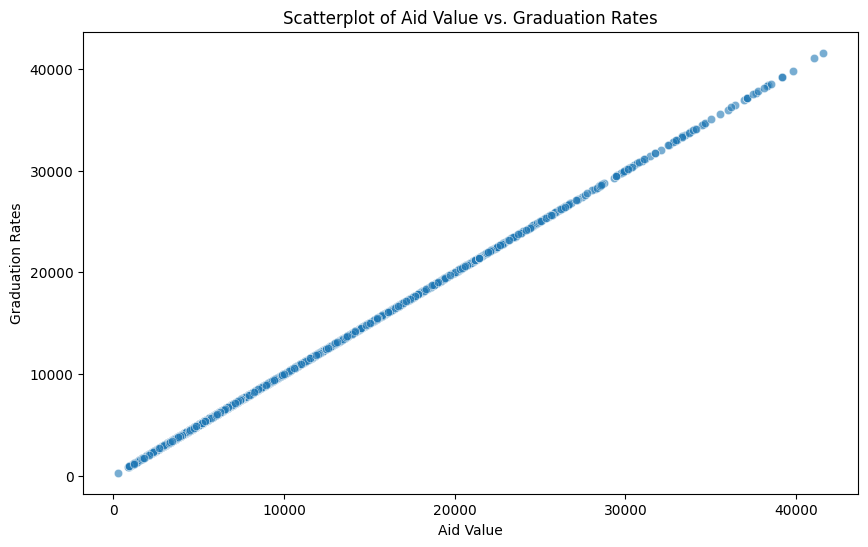

In [86]:
#scatterplot grad by aid
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college_completion_dataset, x='aid_value', y='grad_100_value')
plt.title("Scatterplot of Aid Value vs. Graduation Rates")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rates")
plt.show()

The scatterplot suggests a positive relationship between aid value and graduation rates. Institutions that provide more financial aid tend to show higher graduation outcomes.

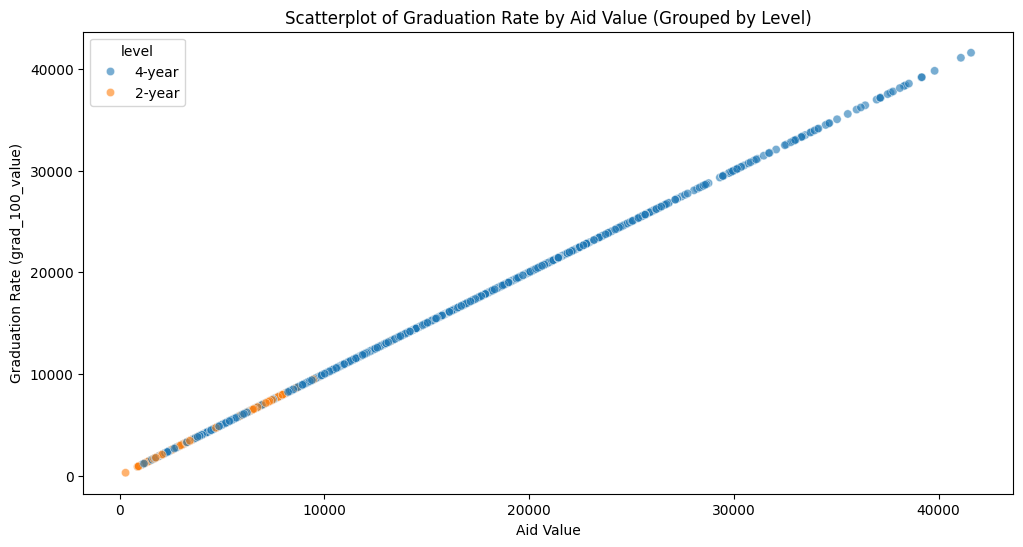

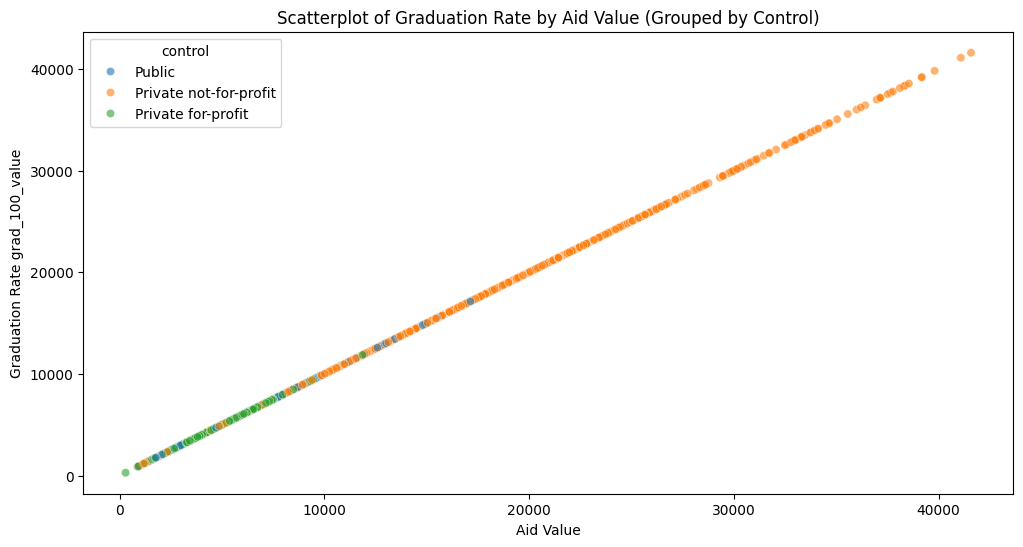

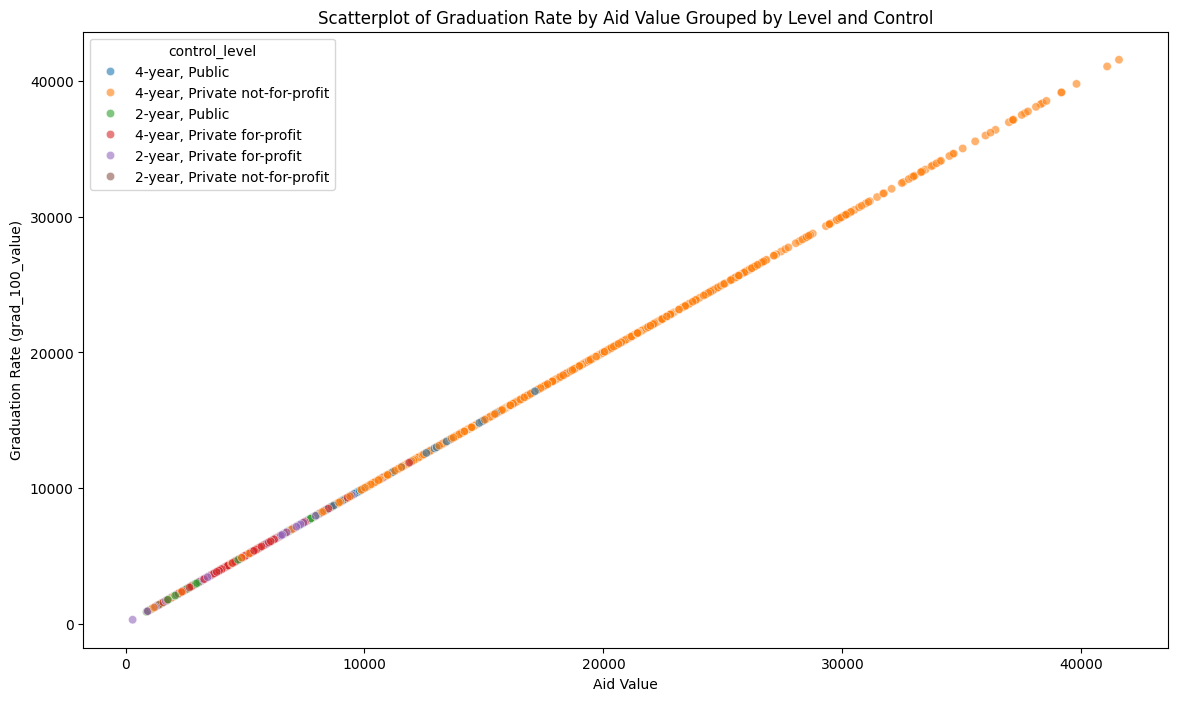

In [95]:
#Scatterplot grouped by level
plt.figure(figsize=(12, 6))
sns.scatterplot(data=college_completion_dataset, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.title('Scatterplot of Graduation Rate by Aid Value (Grouped by Level)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=college_completion_dataset, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title('Scatterplot of Graduation Rate by Aid Value (Grouped by Control)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate grad_100_value')
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=college_completion_dataset, x='aid_value', y='grad_100_value', hue='control_level', alpha=0.6)
plt.title('Scatterplot of Graduation Rate by Aid Value Grouped by Level and Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.show()

The scatterplots suggest a general positive link between aid value and graduation rates, though the data show wide variation, especially at lower aid levels. Some schools with high aid still have low graduation rates, and vice versa, showing that aid isn’t the only factor at play.

When broken down by level, 2-year institutions cluster at the lower end for both aid and graduation, while 4-year schools display a stronger upward trend across a wider range.

By control, public schools concentrate at lower aid values with moderate graduation rates. For-profit schools also sit at the lower end with little clear pattern. Not-for-profit private schools, however, cover the broadest range and show the strongest positive relationship between aid and graduation outcomes.

Overall, the trend is clearest for 4-year, private not-for-profit institutions, which consistently combine higher aid with higher graduation rates.